**CNN (MNIST DIGIT DATASET)**


Insert Code wherever represented with "#***************#"

# Importing Libraries

In [2]:
import keras
import cv2
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Data Preprocessing

4422102/4422102 [==============================] - 0s 0us/step


<ipython-input-3-c540e36ae3c4>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,i+1)


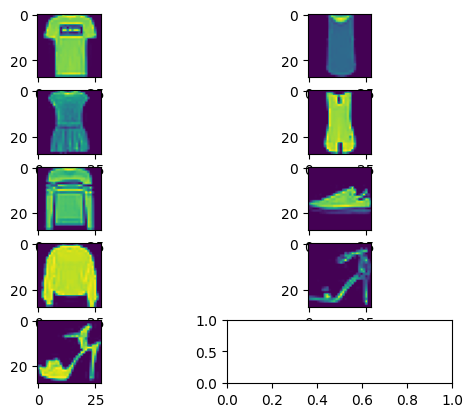

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train= x_train.reshape(60000,28,28)

x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,10)

y_test=keras.utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(10):
  plt.imshow(x_train[i])
  plt.subplot(5,2,i+1)

# Build CNN Model

In [4]:
x_train /= 255
x_test /=255
model = None  #Initialize model here

'''
Define batch size of 64 ,
No of classes (interpret from data)
Train for 5 epochs

'''
batch_size=64
num_classes=10
epochs=5

def build_model(optimizer):

  '''
  Define a sequential model with categorical cross entropy as loss function consisting
  2 convolution and 2 pooling layers with relu as activation function followed by
  droput -> flatten -> dense -> dropout -> dense

  Convolution layer - (kernel size = (3*3))
  Pooling layer - (pool size = (2*2))

  '''

  #****** INSERT MODEL CODE HERE ******
  model=Sequential()
  model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])
  model.summary()

  return model

#**** call build model with RMSprop and SGDOptimizer Optimizer ****
optimizers = ['Adam', 'Adagrad', 'Adadelta', 'RMSprop', 'SGD']
model=build_model('RMSprop')

plot_model(model, to_file="mnist model"+ '.jpg', show_shapes=True)
hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0

In [ ]:
optimizers = ['Adam', 'Adagrad', 'Adadelta', 'RMSprop', 'SGD']
model=build_model('RMSprop')

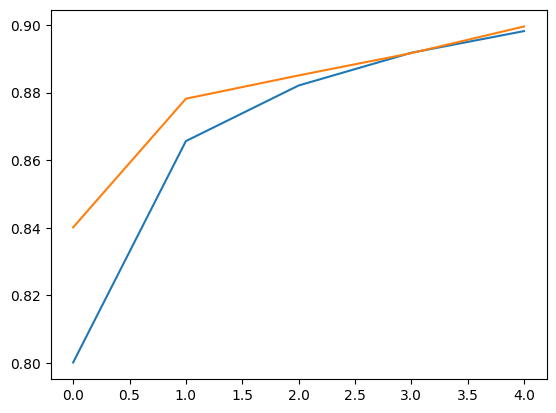

In [5]:
y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

# Predict Image

<ipython-input-6-43f3c1486603>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model, "mnist.h5", save_format="h5")


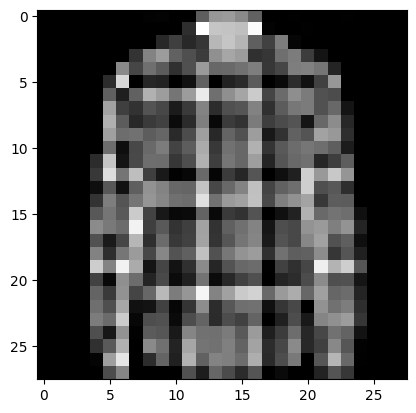

In [6]:
keras.models.save_model(model, "mnist.h5", save_format="h5")

labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def predict_image(model, img):

  '''
  Reshape the image into (1,28,28)
  predict the answer and print it

  '''
  #**** Insert code here ****
  img=np.reshape(img, (1, 28, 28))
  img=img.astype('float32')
  img=img/255


m = load_model('/content/mnist.h5')
predict_image(m, x_test[7])
plt.imshow(x_test[7],cmap='gray')
